In [6]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()

In [142]:
class LogisticRegressionGD:
    
    """Gradient descent-based logistic regression classifier.
    
    Args:
        eta (float): Learning rate (between 0.0 and 1.0)
        n_iter (int): Passes over the training dataset.
        random_state (int): Random number generator seed for random weight
            initialization.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    @staticmethod
    def calculate_gradient(x, y, a):
        """        
        Args:
            x (np.ndarray): Training data. Shape (n_samples, n_features).
            y (np.ndarray): Target values. Shape (n_samples).
            a (np.ndarray): Array with values of act_func(net_input). 
        
        Returns:
            np.ndarray: Coefficient of the features in the decision function.

        """          
        error = a.ravel() - y.ravel()        
        gd = np.zeros(shape = (x.shape[1], 1))
        for j in range(x.shape[1]):
            gd[j] = sum(x[:, j]*error)/x.shape[0] 
            
        return gd        
    
    def fit(self, x, y ):
        
        """        
        Args:
            x (np.ndarray): Training data. Shape (n_samples, n_features).
            y (np.ndarray): Target values. Shape (n_samples).
        
        Returns:
            np.ndarray: Coefficient of the features in the decision function.

        """
        # Get initial waits
        rng = np.random.default_rng(self.random_state)
        self.weights = rng.normal(loc=0.0, scale=1.0, size = (x.shape[1], 1))
        self.losses = []
        self.weights_iter = []
        
        if y.ndim !=2:
            y = y.reshape(-1, 1)
        
        for _ in range(self.n_iter):
            
            a = self.activation(self.net_input(x))
#             if sum(a==0) > 0:
#                 print(a)
#             if sum(a==1) > 0:
#                 print(a)
            log_a = np.where(a==0)
            loss = -1*(np.sum(y * np.log(a)) +
                       np.sum((1-y) * np.log(1-a)))/x.shape[0]
            
            self.losses.append(loss)           
            gd = -1* self.calculate_gradient(x, y, a)
            self.weights = self.weights + self.eta * gd        
            self.weights_iter.append(self.weights)
            
        return self.weights
            
            
    def net_input(self, x: np.ndarray) -> np.ndarray:
        """Calculates the net input."""
        return x @ self.weights
    
    def activation(self, z: np.ndarray) -> np.ndarray:
        """Computes sigmoid function"""
        return 1. / (1.0 + np.exp(-np.clip(z, -250, 250)))    

In [149]:
np.log(1)

0.0

In [139]:
x = iris.data[:, [2, 3]]
y = iris.target

In [146]:
def activation(z: np.ndarray) -> np.ndarray:
    """Computes sigmoid function"""
    return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

activation(100)

1.0

In [ ]:
    def activation(self, z: np.ndarray) -> np.ndarray:
        """Computes sigmoid function"""
        return 1. / (1.0 + np.exp(-np.clip(z, -250, 250)))  

In [143]:
lr = LogisticRegressionGD(n_iter = 1000)
lr.fit(x, y)

C:\Users\lpeve\AppData\Local\Temp\ipykernel_22504\2386307716.py:63: RuntimeWarning: divide by zero encountered in log
  np.sum((1-y) * np.log(1-a)))/x.shape[0]
C:\Users\lpeve\AppData\Local\Temp\ipykernel_22504\2386307716.py:63: RuntimeWarning: invalid value encountered in multiply
  np.sum((1-y) * np.log(1-a)))/x.shape[0]


In [144]:
np.log(0)

C:\Users\lpeve\AppData\Local\Temp\ipykernel_22504\2933082444.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(0)


-inf

In [148]:
lr.losses

[-0.7890560828174857,
 -0.8215283124011904,
 -0.8534511190711144,
 -0.884869234130674,
 -0.9158227522499371,
 -0.9463476966594284,
 -0.9764765053516521,
 -1.0062384506847006,
 -1.0356600026516696,
 -1.0647651443406276,
 -1.0935756466873305,
 -1.122111308456298,
 -1.150390166426533,
 -1.1784286799671457,
 -1.2062418935338843,
 -1.2338435800749494,
 -1.2612463678830137,
 -1.2884618530535767,
 -1.3155006993946161,
 -1.3423727273676738,
 -1.3690869934178074,
 -1.3956518608615789,
 -1.4220750633430093,
 -1.4483637617320275,
 -1.47452459522477,
 -1.5005637273066756,
 -1.5264868871550723,
 -1.5522994069855622,
 -1.5780062557843886,
 -1.6036120698150995,
 -1.629121180241442,
 -1.6545376381682055,
 -1.6798652373663685,
 -1.7051075349190854,
 -1.7302678699974934,
 -1.7553493809529372,
 -1.7803550208909624,
 -1.8052875718754207,
 -1.8301496578939127,
 -1.8549437567034226,
 -1.8796722106614672,
 -1.9043372366373996,
 -1.9289409350897961,
 -1.9534852983855702,
 -1.9779722184307433,
 -2.002403493674

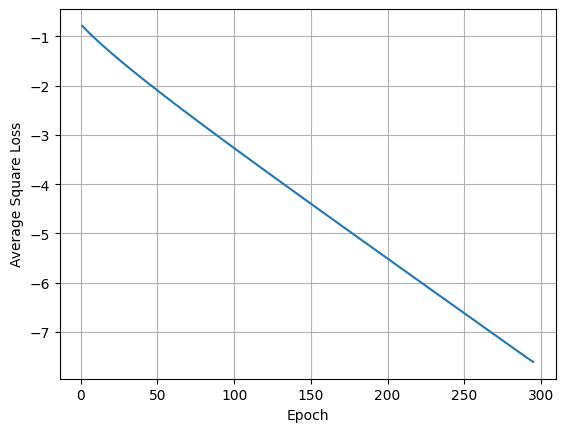

In [147]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(range(1, lr.n_iter+1), lr.losses)
ax.set_xlabel('Epoch')
ax.set_ylabel('Average Square Loss')
ax.grid()
plt.show()

In [102]:
self.weights

NameError: name 'self' is not defined

In [ ]:
x.shape

In [ ]:
random_state = 7


rng = np.random.default_rng(random_state)
weights = rng.normal(loc=0.0, scale=1.0, size = (x.shape[1], 1))

def activation(self, z: np.ndarray) -> np.ndarray:
    """Computes sigmoid function"""
    return 1 / (1+np.exp(-z))
    
    
def calculate_gradient(x):
    pass

In [ ]:
a = np.array([1,2,3,4])
b = np.array([1,2,3,4])
np.dot(a,b)

In [ ]:
a = np.array([1,2,3,4]).reshape(-1, 1)
b = np.array([1,2,3,4]).reshape(-1, 1)
np.dot(a,b)

In [ ]:
a

In [ ]:
b